In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the dataset (no header, so we mention header=None)
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car_evaluation.csv', header=None, names=columns)

# View the first few rows
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
'''
Features: buying, maint, doors, persons, lug_boot, safety
Target variable: class
Type: All are categorical features (not numeric).
'''

In [3]:
# Data Preprocessing
# Check for missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [4]:
# No missing values. Encoding categorical variables: Since all features are categorical, we must encode them numerically.

from sklearn.preprocessing import LabelEncoder

# Encode all columns
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# View the transformed data
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [5]:
# Feature selection: All features are important based on domain knowledge (like safety, price, maintenance cost, etc.), so we will use all features for now.

# Split into X (features) and y (target)
X = df.drop('class', axis=1)
y = df['class']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346

Decision Tree Accuracy: 0.9739884393063584


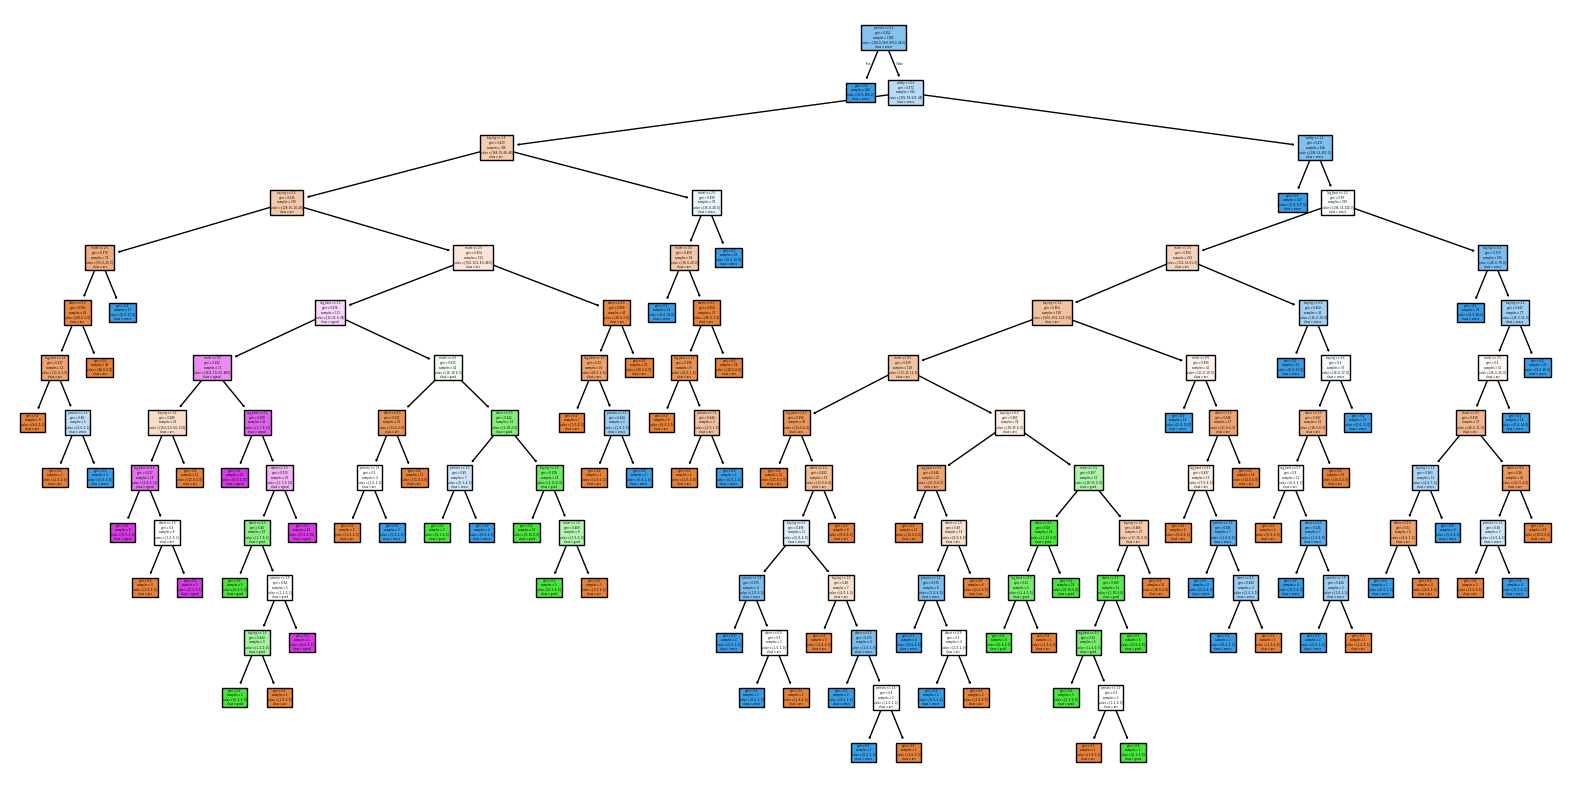

In [6]:
# Decision Tree Implementation

# Initialize and train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred_tree = dtree.predict(X_test)

# Evaluate
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=le.classes_)
plt.show()

In [ ]:
'''
Splitting Criteria and Tree Structure:
The default splitting criterion is Gini Impurity.
The tree splits based on features like safety, buying price, maintenance cost etc., trying to maximize class purity at each node.
'''

In [7]:
# Random Forest Implementation

# Initialize and train Random Forest
rforest = RandomForestClassifier(random_state=42, n_estimators=100)
rforest.fit(X_train, y_train)

# Predictions
y_pred_rf = rforest.predict(X_test)

# Evaluate
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346

Random Forest Accuracy: 0.9739884393063584


In [ ]:
'''
Comparison with Decision Tree:
Random Forest uses multiple trees and aggregates their predictions (majority voting).
Unlike Decision Tree, Random Forest reduces overfitting and generalizes better.
It uses random subsets of features at each split.
'''

In [8]:
# Compare models accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Decision Tree Accuracy: 0.9739884393063584
Random Forest Accuracy: 0.9739884393063584


In [ ]:
'''
Decision Tree is already doing very well (because the dataset is relatively "clean" and "simple").
Random Forest generally improves performance when the single Decision Tree overfits — here, 
since the Decision Tree itself is very accurate and the dataset is not very noisy, the Random Forest doesn't show a big gain.
Still, Random Forest will generalize better if you had a larger or noisier dataset.
'''

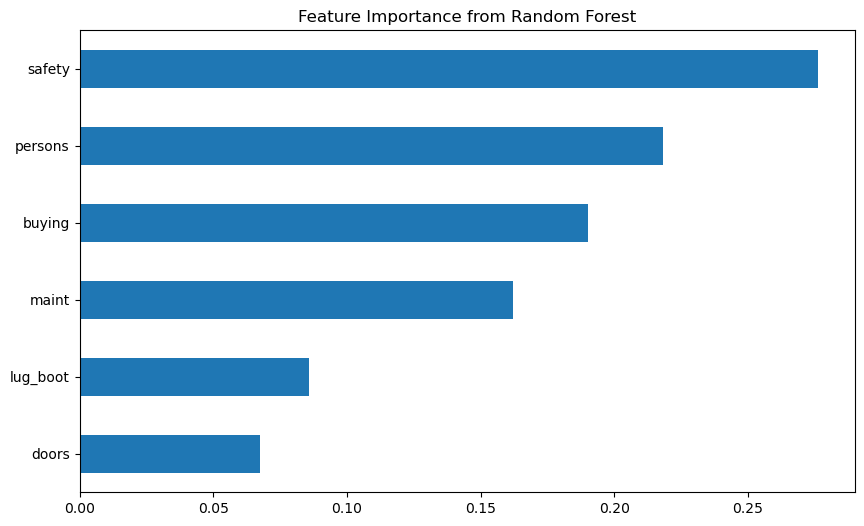

In [9]:
# Feature Importance
importances = rforest.feature_importances_
feature_names = X.columns

# Plotting
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
'''
Discussion on important features:
Safety and persons are typically the most important features.
This makes sense because customers highly value safety and capacity when evaluating a car.
'''